In [891]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
import os
import glob

# Behaviour data analysis plan

## Data Clearning
caculate the Z score.
If Z < -3 OR Z > 3, delete it.

## Data Ploting
relative, error. what is the meaning, 
1. other factor all average?

## Caculate index: For each participant, in each condition
### Caculate CV
### Caculate RMSE, according to bayesion theory, the RMSE should be accumulated to the average.
### Caculate Precision, plot precision accuacy trade-off

## Statistical Analysis

### 2. Ratio and length: paired T-test 

### 3. Attention and recall method: repeated ANOVA

### not sure:  linear regression

 

In [892]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
Data_1 = {}
number_sub = len(csv_files)
for i in range(number_sub):
    print(csv_files[i])
    Data_1[i] = pd.read_csv(csv_files[i])

/home/ys270224/Documents/MATLAB/RT-in-WM/Behavior data analysis/Data/Data_1/subject_001_block_1_01-Jul-2022.csv
/home/ys270224/Documents/MATLAB/RT-in-WM/Behavior data analysis/Data/Data_1/subject_003_block_1_23-Aug-2022.csv
/home/ys270224/Documents/MATLAB/RT-in-WM/Behavior data analysis/Data/Data_1/subject_005_block_1_28-Aug-2022.csv
/home/ys270224/Documents/MATLAB/RT-in-WM/Behavior data analysis/Data/Data_1/subject_004_block_1_26-Aug-2022.csv
/home/ys270224/Documents/MATLAB/RT-in-WM/Behavior data analysis/Data/Data_1/subject_002_block_1_22-Aug-2022.csv


In [893]:
Data_1[2]

,trial,sequence,retention,attention,cue,n_items,trialstart,realtonestart_1,realtonestart_2,encoding_over,retention_over,Produced_id_1,Produced_id_2,Produced_id_3,Produced,Error,got_clicks,feedback,trailstop
0,1,1.04,2.08,3,1,1,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.940325,-0.099675,2,1.661699e+09,1.661699e+09
1,2,0.52,1.04,3,1,1,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.498901,-0.021099,2,1.661699e+09,1.661699e+09
2,3,0.52,1.04,3,1,1,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.740252,0.220252,2,1.661699e+09,1.661699e+09
3,4,1.04,2.08,3,1,1,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,1.404809,0.364809,2,1.661699e+09,1.661699e+09
4,5,0.52,1.04,3,1,1,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.827542,0.307542,2,1.661699e+09,1.661699e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,0.52,0.52,3,1,1,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,NaN,0.529800,0.009800,2,1.661700e+09,1.661700e+09
97,98,2.08,2.08,3,1,1,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,NaN,1.645102,-0.434898,2,1.661700e+09,1.661700e+09
98,99,1.04,1.04,3,1,1,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,NaN,1.001321,-0.038679,2,1.661700e+09,1.661700e+09
99,100,1.04,1.04,3,1,1,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,NaN,1.052360,0.012360,2,1.661700e+09,1.661700e+09


In [894]:
#check wrong_clicks
for i in range(number_sub):
    if len(Data_1[i])!= 100:
        print(i)
        data = Data_1[i]
#         data_out = data.loc[data['got_clicks'] != 2]
        row_index= data[data['got_clicks'] != 2].index.tolist()
        print(row_index)
        Data_1[i]= data.drop(index)

2
[59]
3
[63]
4
[87]


In [895]:
Data_1[2].reset_index()

,index,trial,sequence,retention,attention,cue,n_items,trialstart,realtonestart_1,realtonestart_2,encoding_over,retention_over,Produced_id_1,Produced_id_2,Produced_id_3,Produced,Error,got_clicks,feedback,trailstop
0,0,1,1.04,2.08,3,1,1,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.940325,-0.099675,2,1.661699e+09,1.661699e+09
1,1,2,0.52,1.04,3,1,1,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.498901,-0.021099,2,1.661699e+09,1.661699e+09
2,2,3,0.52,1.04,3,1,1,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.740252,0.220252,2,1.661699e+09,1.661699e+09
3,3,4,1.04,2.08,3,1,1,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,1.404809,0.364809,2,1.661699e+09,1.661699e+09
4,4,5,0.52,1.04,3,1,1,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.827542,0.307542,2,1.661699e+09,1.661699e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,0.52,0.52,3,1,1,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,NaN,0.529800,0.009800,2,1.661700e+09,1.661700e+09
96,97,98,2.08,2.08,3,1,1,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,NaN,1.645102,-0.434898,2,1.661700e+09,1.661700e+09
97,98,99,1.04,1.04,3,1,1,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,NaN,1.001321,-0.038679,2,1.661700e+09,1.661700e+09
98,99,100,1.04,1.04,3,1,1,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,NaN,1.052360,0.012360,2,1.661700e+09,1.661700e+09


In [896]:
for i in range(len(Data_1[2]['got_clicks'])):
    check = Data_1[2][Data_1[2]['got_clicks']!=2].index
#     print(check)

In [897]:
Data_condition = {}
for i in range(number_sub):
    Data_condition[i]={}
for i in range(number_sub):
    Data_condition[i]['1_s']= Data_1[i].loc[(Data_1[i]['sequence'] == 0.52) & (Data_1[i]['retention'] == 0.52)].reset_index()
    Data_condition[i]['1_m']= Data_1[i].loc[(Data_1[i]['sequence'] == 1.04) & (Data_1[i]['retention'] == 1.04)].reset_index()
    Data_condition[i]['1_l']= Data_1[i].loc[(Data_1[i]['sequence'] == 2.08) & (Data_1[i]['retention'] == 2.08)].reset_index()
    Data_condition[i]['2_s']= Data_1[i].loc[(Data_1[i]['sequence'] == 0.52) & (Data_1[i]['retention'] == 1.04)].reset_index()
    Data_condition[i]['2_m']= Data_1[i].loc[(Data_1[i]['sequence'] == 1.04) & (Data_1[i]['retention'] == 2.08)].reset_index()

In [898]:
check_len = 0
for i in list(Data_condition[0].keys()):
    t = len(Data_condition[0][i])
    check_len += t
print(check_len)

100


In [899]:
keys = list(Data_condition[0].keys())
keys

['1_s', '1_m', '1_l', '2_s', '2_m']

In [900]:
Data_condition[4]['2_m']

,index,trial,sequence,retention,attention,cue,n_items,trialstart,realtonestart_1,realtonestart_2,encoding_over,retention_over,Produced_id_1,Produced_id_2,Produced,Error,got_clicks,feedback,trailstop
0,5,6,1.04,2.08,3,1,1,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,0.780605,-0.259395,2,1.661179e+09,1.661179e+09
1,7,8,1.04,2.08,3,1,1,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.432881,0.392881,2,1.661179e+09,1.661179e+09
2,9,10,1.04,2.08,3,1,1,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.001301,-0.038699,2,1.661179e+09,1.661179e+09
3,11,12,1.04,2.08,3,1,1,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.085687,0.045687,2,1.661179e+09,1.661179e+09
4,25,26,1.04,2.08,3,1,1,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.032011,-0.007989,2,1.661179e+09,1.661179e+09
5,30,31,1.04,2.08,3,1,1,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,0.825997,-0.214003,2,1.661179e+09,1.661179e+09
6,31,32,1.04,2.08,3,1,1,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,0.852177,-0.187823,2,1.661179e+09,1.661179e+09
7,36,37,1.04,2.08,3,1,1,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.052012,0.012012,2,1.661179e+09,1.661179e+09
8,43,44,1.04,2.08,3,1,1,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.030102,-0.009898,2,1.661179e+09,1.661179e+09
9,52,53,1.04,2.08,3,1,1,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,1.661179e+09,0.975112,-0.064888,2,1.661179e+09,1.661179e+09


/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


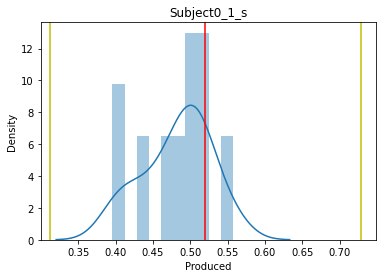

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


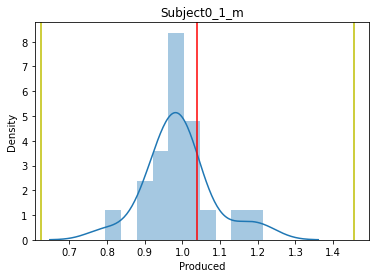

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


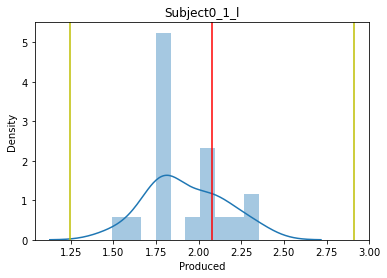

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


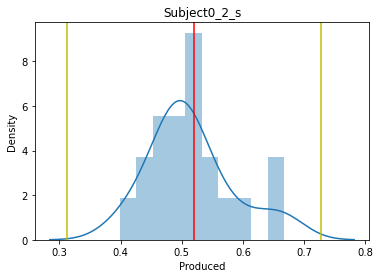

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


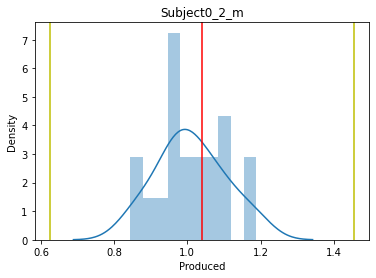

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


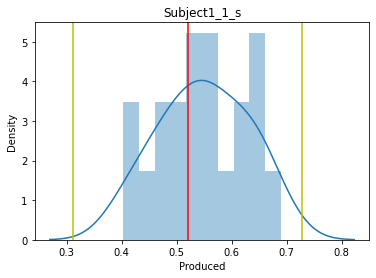

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


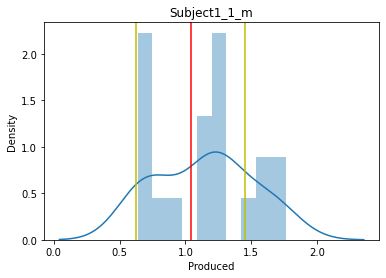

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


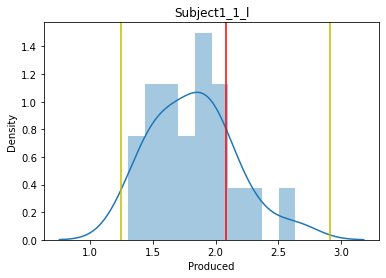

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


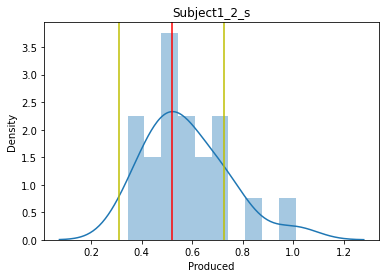

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


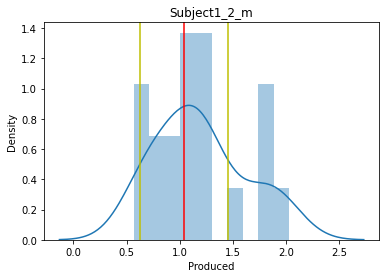

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


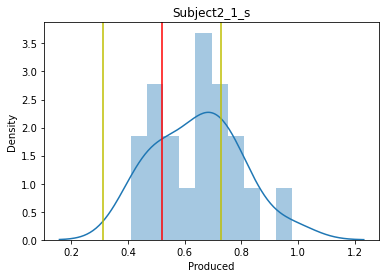

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


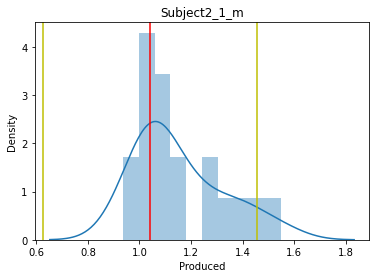

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


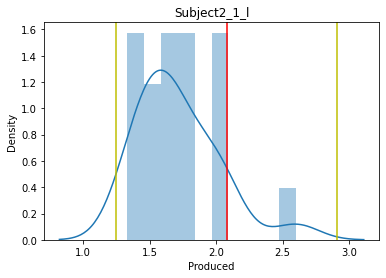

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


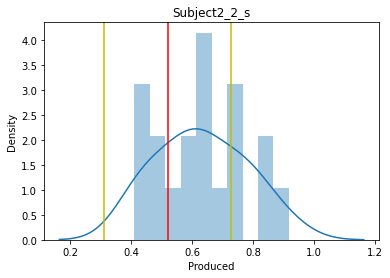

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


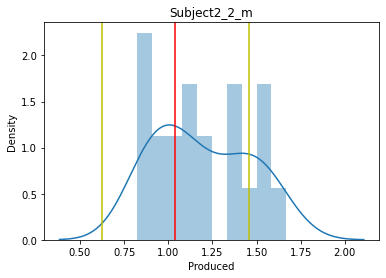

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


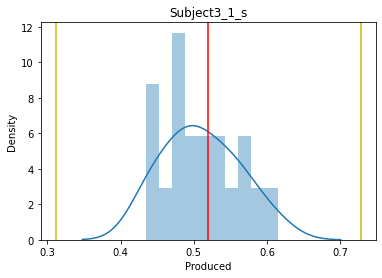

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


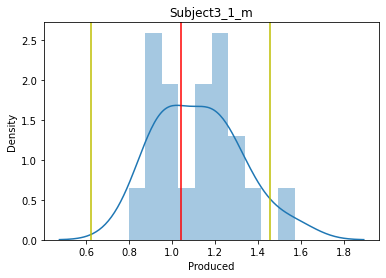

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


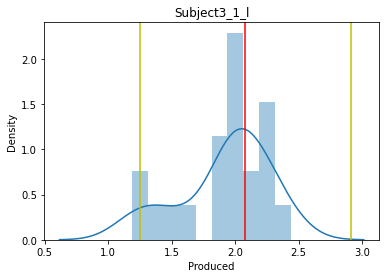

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


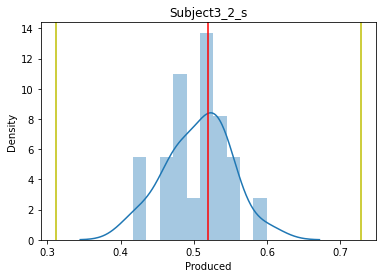

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


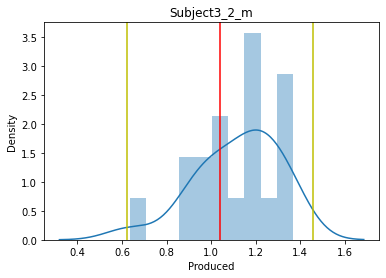

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


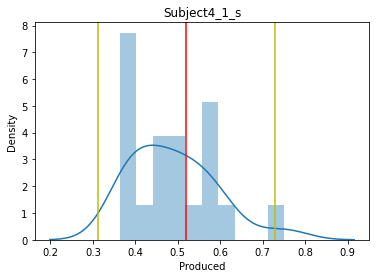

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


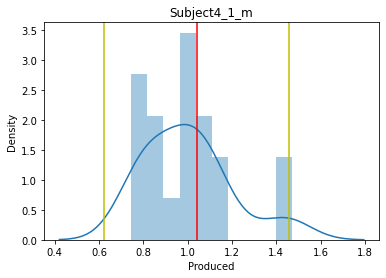

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


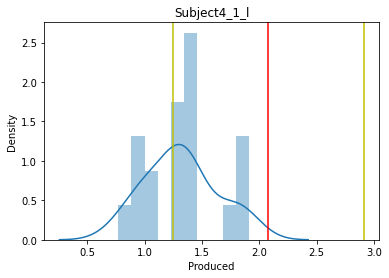

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


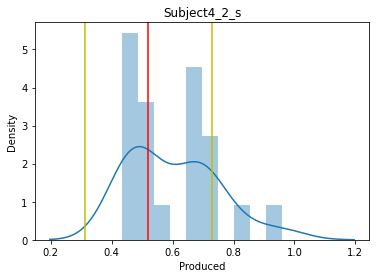

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


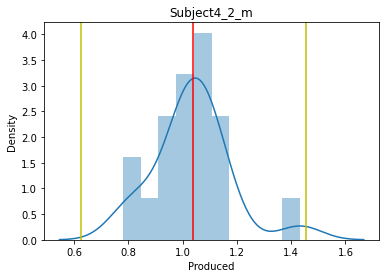

In [1024]:
import seaborn as sns
for i in range(number_sub):    
    for key in keys:
        data = Data_condition[i][key]['Produced']
        sns.distplot(data,bins= 10,hist=True)
        plt.axvline(x=Data_condition[i][key]['sequence'][0], color='r', linestyle='-')
        plt.axvline(x=Data_condition[i][key]['sequence'][0]*1.4, color='y', linestyle='-')
        plt.axvline(x=Data_condition[i][key]['sequence'][0]*0.6, color='y', linestyle='-')
        plt.title('Subject'+ str(i)+'_'+key)
        plt.show()      

## Basic decription statics
### Check data - detect outliner
1. absolute cut-off: decide before with a arbitrary set
2. relative cut-off: if it's a normal distribution, 3 std means cut 5% off; any distribution, 5% off
### Produce mean, std, CV

In [901]:
# check outliner se>3
out_trial = {}
for i in range(number_sub):
    out_trial[i] = {}
    for key in keys:
        data =  Data_condition[i][key]
        zscore = stats.zscore(data['Produced'])
        out=(np.where(abs(zscore) > 3)[0]).tolist()
        if any(out):
            out_trial[i][key] = out
out_trial

{0: {'1_s': [19]},
 1: {},
 2: {'1_s': [17], '1_m': [6]},
 3: {'2_m': [11]},
 4: {}}

In [902]:
if out_trial[2]:
    print(out_trial[2]['1_s'][0])

17


In [903]:
Data_out ={}
for i in range(number_sub):
    Data_out[i] = {}
    if out_trial[i]:
        for key in out_trial[i].keys():
            Data_out[i][key] = Data_condition[i][key]
            ind = out_trial[i][key][0]
            Data_condition[i][key] = Data_out[i][key].drop(ind).reset_index()           

In [904]:
 Data_condition[2]['1_s']

,level_0,index,trial,sequence,retention,attention,cue,n_items,trialstart,realtonestart_1,...,encoding_over,retention_over,Produced_id_1,Produced_id_2,Produced_id_3,Produced,Error,got_clicks,feedback,trailstop
0,0,5,6,0.52,0.52,3,1,1,1.661699e+09,1.661699e+09,...,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.575873,0.055873,2,1.661699e+09,1.661699e+09
1,1,13,14,0.52,0.52,3,1,1,1.661699e+09,1.661699e+09,...,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.728226,0.208226,2,1.661699e+09,1.661699e+09
2,2,14,15,0.52,0.52,3,1,1,1.661699e+09,1.661699e+09,...,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.419653,-0.100347,2,1.661699e+09,1.661699e+09
3,3,17,18,0.52,0.52,3,1,1,1.661699e+09,1.661699e+09,...,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.710889,0.190889,2,1.661699e+09,1.661699e+09
4,4,25,26,0.52,0.52,3,1,1,1.661699e+09,1.661699e+09,...,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.409930,-0.110070,2,1.661699e+09,1.661699e+09
5,5,28,29,0.52,0.52,3,1,1,1.661699e+09,1.661699e+09,...,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.980379,0.460379,2,1.661699e+09,1.661699e+09
6,6,35,36,0.52,0.52,3,1,1,1.661699e+09,1.661699e+09,...,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.778911,0.258911,2,1.661699e+09,1.661699e+09
7,7,40,41,0.52,0.52,3,1,1,1.661699e+09,1.661699e+09,...,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.605199,0.085199,2,1.661699e+09,1.661699e+09
8,8,48,49,0.52,0.52,3,1,1,1.661699e+09,1.661699e+09,...,1.661699e+09,1.661699e+09,1.661699e+09,1.661699e+09,NaN,0.829125,0.309125,2,1.661699e+09,1.661699e+09
9,9,54,55,0.52,0.52,3,1,1,1.661700e+09,1.661700e+09,...,1.661700e+09,1.661700e+09,1.661700e+09,1.661700e+09,NaN,0.648387,0.128387,2,1.661700e+09,1.661700e+09


In [713]:
#  Produce mean,std,cv
def CV(data):
    mean = np.mean(data)
    std = np.std(data, ddof =0)
    cv= std/mean
    return mean,cv

Data_descrip={}
for key in keys:
    Data_descrip[key] = pd.DataFrame(index=range(number_sub),columns=['Mean','Std','BIAS','VAR','CV','RMSE'])

In [714]:
Data_descrip['1_s']

,Mean,Std,BIAS,VAR,CV,RMSE
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [715]:
CV(Data_condition[1]['1_s']['Produced'])

(0.5489940166473388, 0.143765306179884)

In [799]:
RMSE = np.sqrt(mean_squared_error(Data_condition[0]['1_s']['sequence'], Data_condition[0]['1_s']['Produced'])) # RMSE
MSE = mean_squared_error(Data_condition[0]['1_s']['sequence'], Data_condition[0]['1_s']['Produced']) # MSE 
VAR = np.var(Data_condition[0]['1_s']['Error'])  # VAR std**2
STD = np.std(Data_condition[0]['1_s']['Error']) # std normally precision
BIAS = np.mean(Data_condition[0]['1_s']['Error']) # bias

In [829]:
for i in range(number_sub):
    for key in keys:
        Data_descrip[key]['BIAS'][i:i+1] = np.mean(Data_condition[i][key]['Error'])
        Data_descrip[key]['Std'][i:i+1] = np.std(Data_condition[i][key]['Error'])
        Data_descrip[key]['VAR'][i:i+1] = np.var(Data_condition[i][key]['Error'])
        Data_descrip[key]['RMSE'][i:i+1] = np.sqrt(mean_squared_error(Data_condition[i][key]['sequence'], Data_condition[i][key]['Produced']))
        mean,c = CV(Data_condition[i][key]['Produced'])
        Data_descrip[key]['Mean'][i:i+1] = mean
        Data_descrip[key]['CV'][i:i+1] = c

In [830]:
Data_descrip['2_s']

,Mean,Std,BIAS,VAR,CV,RMSE
0,0.514733,0.067396,-0.005267,0.004542,0.130935,0.067602
1,0.578143,0.159526,0.058143,0.025449,0.275929,0.169792
2,0.631336,0.143661,0.111336,0.020638,0.22755,0.181752
3,0.50602,0.042804,-0.01398,0.001832,0.08459,0.04503
4,0.60171,0.141753,0.08171,0.020094,0.235583,0.163616


In [831]:
Data_descrip['1_s']

,Mean,Std,BIAS,VAR,CV,RMSE
0,0.482074,0.044044,-0.037926,0.00194,0.091363,0.058122
1,0.548994,0.078926,0.028994,0.006229,0.143765,0.084083
2,0.644225,0.147133,0.124225,0.021648,0.228387,0.192561
3,0.510375,0.050535,-0.009625,0.002554,0.099016,0.051444
4,0.4891,0.097178,-0.0309,0.009444,0.198688,0.101973


## Plot data

In [905]:
def plot_origin(x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,name):
    fig = plt.figure(1,figsize=[5,5])
    plt.xlim((0, 2.5))
    plt.ylim((0, 2.5))
    plt.scatter(x_1,y_1,color='g')
    plt.scatter(x_2,y_2,color='r')
    plt.scatter(x_3,y_3,color='b')
    y_5 = np.arange(0,2.5,0.2)
    x_5 = y_5
    plt.plot(x_5,y_5,color='y',linestyle='dashed')
    plt.plot(x_4,y_4)
    plt.xlabel('Target duration')
    plt.ylabel('Produced duration')
    plt.title(name)
    plt.show()

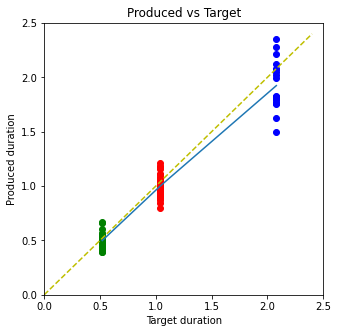

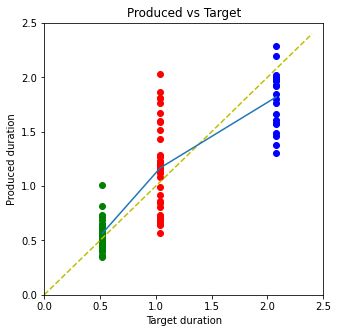

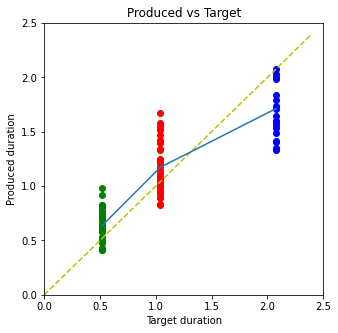

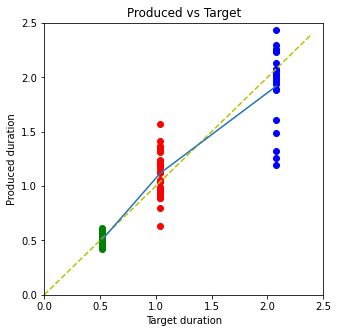

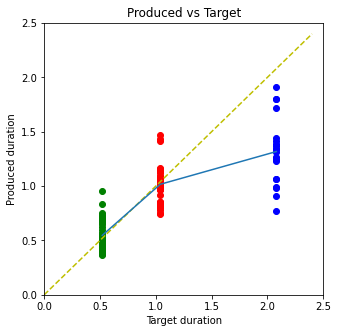

In [906]:
for i in range(number_sub):
    x_s = pd.concat([Data_condition[i]['1_s']['sequence'],Data_condition[i]['2_s']['sequence']])
    y_s = pd.concat([Data_condition[i]['1_s']['Produced'],Data_condition[i]['2_s']['Produced']])
    x_m = pd.concat([Data_condition[i]['1_m']['sequence'],Data_condition[i]['2_m']['sequence']])
    y_m = pd.concat([Data_condition[i]['1_m']['Produced'],Data_condition[i]['2_m']['Produced']])
    x_l = Data_condition[i]['1_l']['sequence']
    y_l = Data_condition[i]['1_l']['Produced']
    x_4 = [0.52,1.04,2.08]
    y_4 = [np.mean(y_s),np.mean(y_m),np.mean(y_l)]
    name = 'Produced vs Target'
    plot_origin(x_s,y_s,x_m,y_m,x_l,y_l,x_4,y_4,name)

In [834]:
Data_descrip['1_s']

,Mean,Std,BIAS,VAR,CV,RMSE
0,0.482074,0.044044,-0.037926,0.00194,0.091363,0.058122
1,0.548994,0.078926,0.028994,0.006229,0.143765,0.084083
2,0.644225,0.147133,0.124225,0.021648,0.228387,0.192561
3,0.510375,0.050535,-0.009625,0.002554,0.099016,0.051444
4,0.4891,0.097178,-0.0309,0.009444,0.198688,0.101973


In [1059]:
def plot_descrip_box(key):
    fig = plt.figure(4,figsize=[10,10])

    plt.subplot(2,2,1)
    Labels_1 = [1,2]
    box_1, box_2= Data_descrip['1_s'][key],Data_descrip['2_s'][key] 
    plt.boxplot([box_1, box_2],labels = Labels_1,patch_artist = True, boxprops = {'color':'orangered','facecolor':'green'})
    plt.xlabel('Ratio of retention')
    plt.ylabel(key + ' of Produced duration')
    plt.ylim(0,0.5)
    plt.title('Ratio: 1vs2 of s')

    plt.subplot(2,2,2)
    Labels_2 = [1,2]
    box_3, box_4= Data_descrip['1_m'][key],Data_descrip['2_m'][key] 
    plt.boxplot([box_3, box_4],labels = Labels_2,patch_artist = True, boxprops = {'color':'orangered','facecolor':'green'})
    plt.xlabel('Ratio of retention')
    plt.ylabel(key + ' of Produced duration')
    plt.ylim(0,0.5)
    plt.title('Ratio: 1vs2 of m')

    plt.subplot(2,2,3)
    Labels_3 = ['S','M','L']
    box_5, box_6,box_7 = Data_descrip['1_s'][key],Data_descrip['1_m'][key],Data_descrip['1_l'][key]
    plt.boxplot([box_5, box_6,box_7],labels = Labels_3,patch_artist = True, boxprops = {'color':'orangered','facecolor':'blue'})
    plt.xlabel('Ratio of retention')
    plt.xlabel('Length of retention')
    plt.ylabel(key + ' of Produced duration')
    plt.ylim(0,0.5)
    plt.title('Length: S vs M vs L of ratio 1' )

    plt.subplot(2,2,4)
    Labels_4 = ['S','M']
    box_8, box_9 = Data_descrip['2_s'][key],Data_descrip['2_m'][key] 
    plt.boxplot([box_8, box_9],labels = Labels_4,patch_artist = True, boxprops = {'color':'orangered','facecolor':'blue'})
    plt.xlabel('Ratio of retention')
    plt.xlabel('Length of retention')
    plt.ylabel(key + ' of Produced duration')
    plt.ylim(0,0.5)
    plt.title('Length: S vs M of ratio 2')

    plt.suptitle(key + ' test')
    plt.show()

In [1098]:
def plot_descrip_errorbar(key):
    fig = plt.figure(4,figsize=[10,10])
  
    plt.subplot(2,2,1)
    m_1 = [[1,1,1,1,1],[2,2,2,2,2]]
    n_1 = [Data_descrip['1_s'][key],Data_descrip['2_s'][key]]
    plt.scatter(m_1,n_1)
    x_1 = [1,2]
    y_1= np.mean(Data_descrip['1_s'][key]),np.mean(Data_descrip['2_s'][key])
    std_1 = np.std(Data_descrip['1_s'][key])/np.sqrt(number_sub),np.std(Data_descrip['2_s'][key]/np.sqrt(number_sub))
    plt.errorbar(x_1,y_1,fmt="bo:",yerr=std_1)
    plt.ylim(0, 0.5)
    plt.xlabel('Ratio of retention')
    plt.ylabel(key + ' of Produced duration')
    plt.title('Ratio: 1vs2 of s')

    plt.subplot(2,2,2)
    m_2 = [[1,1,1,1,1],[2,2,2,2,2]]
    n_2 = [Data_descrip['1_m'][key],Data_descrip['2_m'][key]]
    plt.scatter(m_2,n_2)
    x_2 = [1,2]
    y_2= np.mean(Data_descrip['1_m'][key]),np.mean(Data_descrip['2_m'][key])
    std_2 = np.std(Data_descrip['1_m'][key])/np.sqrt(number_sub),np.std(Data_descrip['2_m'][key])/np.sqrt(number_sub)
    plt.errorbar(x_2,y_2,fmt="bo:",yerr=std_2)
    plt.ylim(0, 0.5)
    plt.xlabel('Ratio of retention')
    plt.ylabel(key + ' of Produced duration')
    plt.title('Ratio: 1vs2 of m')

    plt.subplot(2,2,3)
    m_3 = [[0.52,0.52,0.52,0.52,0.52],[1.04,1.04,1.04,1.04,1.04],[2.08,2.08,2.08,2.08,2.08]]
    n_3 = [Data_descrip['1_s'][key],Data_descrip['1_m'][key],Data_descrip['1_l'][key]]
    plt.scatter(m_3,n_3)
    x_3 = [0.52,1.04,2.08]
    y_3 = np.mean(Data_descrip['1_s'][key]),np.mean(Data_descrip['1_m'][key]),np.mean(Data_descrip['1_l'][key])
    std_3 = np.std(Data_descrip['1_s'][key])/np.sqrt(number_sub),np.std(Data_descrip['1_m'][key])/np.sqrt(number_sub),np.std(Data_descrip['1_l'][key]/np.sqrt(4))
    plt.errorbar(x_3,y_3,fmt="bo:",yerr=std_3)
    plt.ylim(0, 0.5)
    plt.xlabel('Ratio of retention')
    plt.xlabel('Length of retention')
    plt.ylabel(key + ' of Produced duration')
    plt.title('Length: S vs M vs L of ratio 1' )

    plt.subplot(2,2,4)
    m_4 = [[0.52,0.52,0.52,0.52,0.52],[1.04,1.04,1.04,1.04,1.04]]
    n_4 = [Data_descrip['2_s'][key],Data_descrip['2_m'][key]]
    plt.scatter(m_4,n_4)
    x_4 = [0.52,1.04]
    y_4 = np.mean(Data_descrip['2_s'][key]),np.mean(Data_descrip['2_m'][key])
    std_4 = np.std(Data_descrip['2_s'][key])/np.sqrt(number_sub),np.std(Data_descrip['2_m'][key])/np.sqrt(number_sub)
    plt.errorbar(x_4,y_4,fmt="bo:",yerr=std_4)
    plt.ylim(0, 0.5)
    plt.xlabel('Ratio of retention')
    plt.xlabel('Length of retention')
    plt.ylabel(key + ' of Produced duration')
    plt.title('Length: S vs M of ratio 2')

    plt.suptitle(key + ' test')
    plt.show()

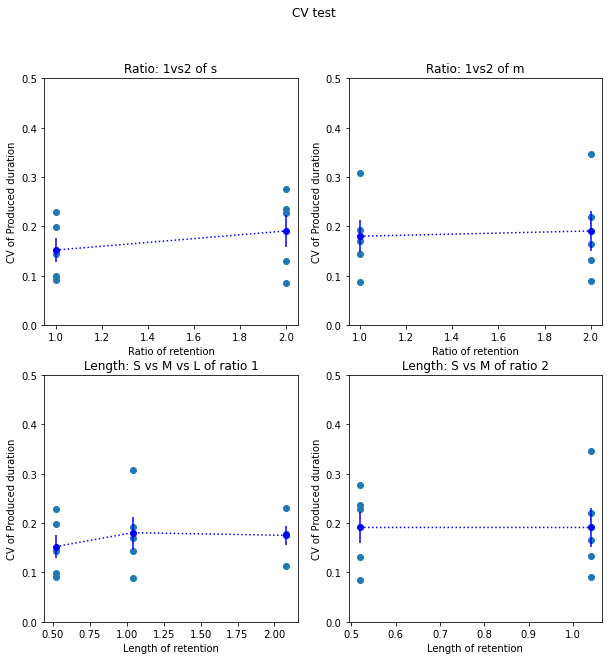

In [1099]:
plot_descrip_errorbar('CV')

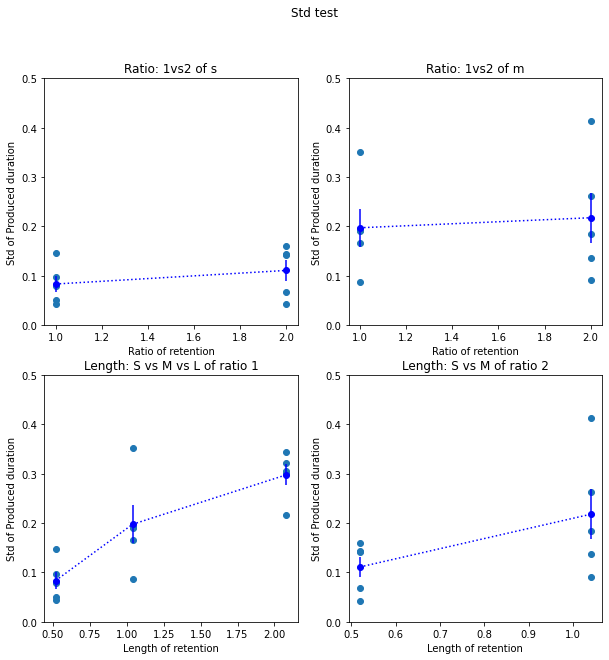

In [1105]:
plot_descrip_errorbar('Std')

In [1101]:
from scipy import stats
import numpy as np
import scipy.stats
y_1 = Data_descrip['1_s']['CV']
y_2 = Data_descrip['2_s']['CV']
t, pval = scipy.stats.ttest_rel(y_1, y_2,alternative='two-sided')
print(t,pval)

-1.5096647317408396 0.20563852402138683


# Caculate the sample size  
1. alpha = 0.05
2. power = 0.8
3. effect size (setted or caculated) 
4. sample size
## with setted effect size 
t test:0.2/0.4/0.8
## with pilot data
two paired samples t test

In [1102]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestPower
from statsmodels.stats.proportion import proportion_effectsize as es
alpha = 0.05
power = 0.8
u1 = np.mean(y_1)
u2 = np.mean(y_2) 
std = np.std(y_2-y_1)
effect = (u2-u1)/std

# perform power analysis
result = TTestPower().solve_power(effect,alpha=alpha, power=power,alternative='two-sided')
result

15.803308972104887

In [1103]:
effect

0.75483236587042

In [856]:
Data_descrip['1_l']

,Mean,Std,BIAS,VAR,CV,RMSE
0,1.92403,0.216458,-0.15597,0.046854,0.112502,0.266797
1,1.819842,0.321976,-0.260158,0.103668,0.176925,0.413945
2,1.713709,0.301462,-0.366291,0.090879,0.175912,0.474393
3,1.919697,0.342918,-0.160303,0.117593,0.178631,0.378536
4,1.317675,0.304274,-0.762325,0.092582,0.230917,0.820806


In [880]:
def plot_combine(number_sub):
    fig = plt.figure(1,figsize=[5,5])
    r_1 = Data_descrip['1_s']['RMSE'][number_sub]
    plt.scatter(abs(Data_descrip['1_s']['Std'][number_sub]),abs(Data_descrip['1_s']['BIAS'][number_sub]),color='y')
    a, b = (0., 0.)
    theta = np.arange(0, 2*np.pi, 0.01)
    x_1 = a + r_1 * np.cos(theta)
    y_1 = b + r_1* np.sin(theta)
    plt.plot(x_1, y_1,color='y',linestyle='dashed')

    r_2 = Data_descrip['1_m']['RMSE'][number_sub]
    plt.scatter(abs(Data_descrip['1_m']['Std'][number_sub]),abs(Data_descrip['1_m']['BIAS'][number_sub]),color='g')
    x_2 = a + r_2 * np.cos(theta)
    y_2 = b + r_2* np.sin(theta)
    plt.plot(x_2, y_2,color='g',linestyle='dashed')

    r_3 = Data_descrip['1_l']['RMSE'][number_sub]
    plt.scatter(abs(Data_descrip['1_l']['Std'][number_sub]),abs(Data_descrip['1_l']['BIAS'][number_sub]),color='b')
    x_3 = a + r_3 * np.cos(theta)
    y_3 = b + r_3* np.sin(theta)
    plt.plot(x_3, y_3,color='b',linestyle='dashed')

    r_4 = Data_descrip['2_s']['RMSE'][number_sub]
    plt.scatter(abs(Data_descrip['2_s']['Std'][number_sub]),abs(Data_descrip['2_s']['BIAS'][number_sub]),color='y')
    x_4 = a + r_4 * np.cos(theta)
    y_4 = b + r_4* np.sin(theta)
    plt.plot(x_4, y_4,color='y',linestyle='dashed')


    r_5 = Data_descrip['2_m']['RMSE'][number_sub]
    plt.scatter(abs(Data_descrip['2_m']['Std'][number_sub]),abs(Data_descrip['2_m']['BIAS'][number_sub]),color='g')
    x_5 = a + r_5 * np.cos(theta)
    y_5 = b + r_5* np.sin(theta)
    plt.plot(x_5, y_5,color='g',linestyle='dashed')

    r_max = max(r_1,r_2,r_3,r_4,r_5)
     
    plt.axis('equal')
    plt.xlim(0, r_max)
    plt.ylim(0, r_max)
    plt.xlabel('BIAS(s)')
    plt.ylabel('Std(s)')

    plt.show()

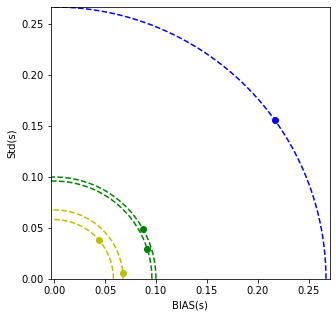

In [883]:
plot_combine(0) 

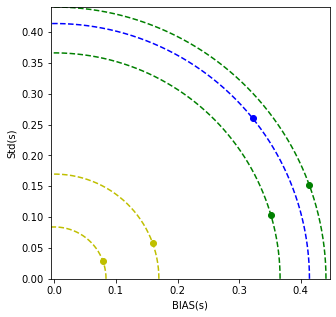

In [884]:
plot_combine(1) 

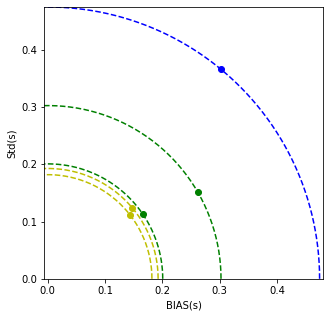

In [887]:
plot_combine(2)

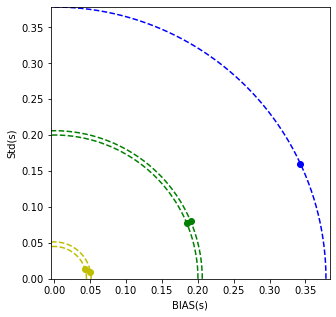

In [888]:
plot_combine(3)

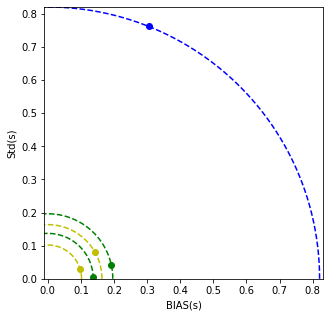

In [889]:
plot_combine(4)

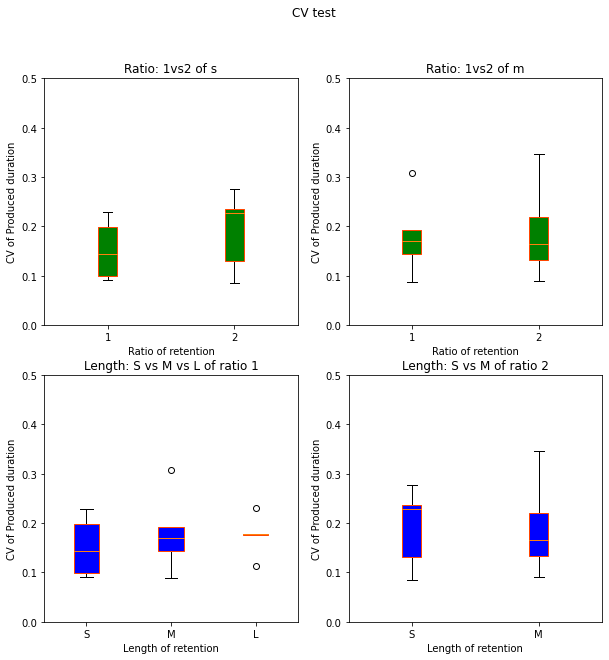

In [1061]:
plot_descrip_box('CV')

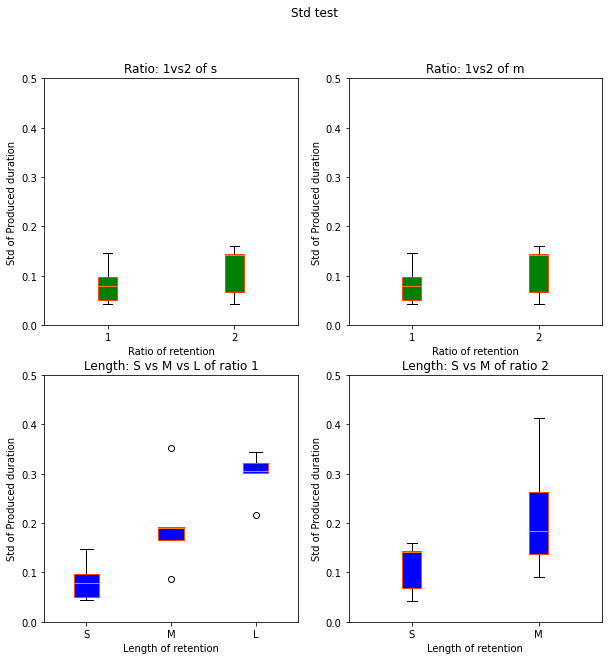

In [965]:
plot_descrip_box('Std')